In [44]:
import pandas as pd

df = pd.read_csv('resources/train.csv')

print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
import random
random.seed(42)

def train_and_eval(data, labels):
    x_train, x_val, y_train, y_val = train_test_split(data,labels, random_state=42)
    clf = SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print("\tPrecision: %1.3f" % precision_score(y_val, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_val, y_pred))
    return clf

In [6]:
df.columns.tolist()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

<Figure size 1000x600 with 0 Axes>

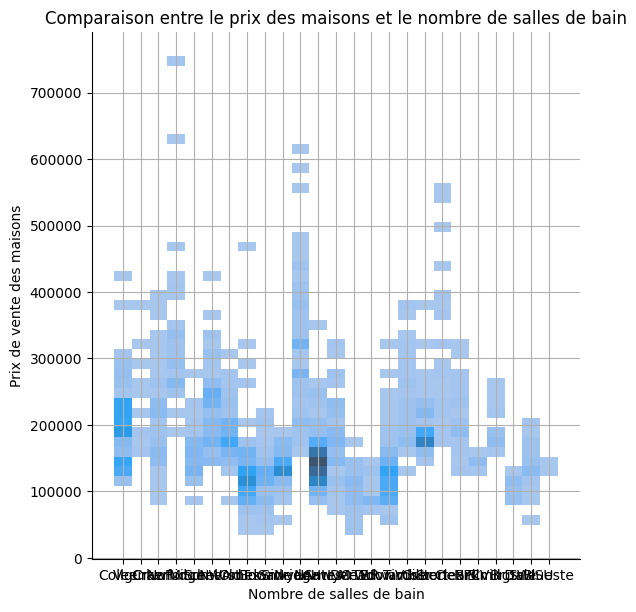

In [46]:
import seaborn as sbn
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sbn.displot(data=df, x='Neighborhood', y='SalePrice', kind='hist', height=6, aspect=1)
plt.title('Comparaison entre le prix des maisons et le nombre de salles de bain')
plt.xlabel('Nombre de salles de bain')
plt.ylabel('Prix de vente des maisons')
plt.grid(True)
plt.show()

In [43]:
#EXO
#Les données sont textuelles, sans ordre à respecter, Il y a plus de 2 catégories : One Hot Encoder
# from sklearn.preprocessing import OrdinalEncoder
# ordinalEncoder = OrdinalEncoder()
# params = df[['Neighborhood', 'LotArea']].values
# params_ord = ordinalEncoder.fit_transform(params)
# clf = train_and_eval(params_ord, y)

In [56]:
from sklearn.linear_model import Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Séparer les caractéristiques (X) de la cible (y)
X = df[['Neighborhood', 'LotArea']] #Les colonnes pertinentes pour estimer le prix
#On remplace les NaN par la moyenne d'âge

#df = df.fillna('NO')

#sklearn simpleImputer
# je fais la moyenne de l'âge de tout le set et pas juste des 80% pour le train
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder
print('Quartiers : ',X['Neighborhood'])
test = df[['Neighborhood', 'LotArea']].values
#X['Neighborhood'] = oneHotEncoder.fit_transform(X['Neighborhood'])
test_onehot = oneHotEncoder.fit_transform(test)

y = df['SalePrice'] #Ce qu'on cherche à déterminer

# Séparer les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(test_onehot, y, test_size=0.2, random_state=42)

# # Afficher les tailles des ensembles d'entraînement et de validation
# print("Taille de l'ensemble d'entraînement :", len(X_train))
# print("Taille de l'ensemble de validation :", len(X_val))


# Créer un modèle
#model = Lasso(alpha=0.1)  # Vous pouvez ajuster alpha selon vos besoins
#model = ElasticNet(alpha=0.1)
#model = LogisticRegression()
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédire les valeurs sur les données de test
y_pred = model.predict(X_val)

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Accuracy
# calcule l'exactitude (accuracy) d'un modèle de classification en comparant les prédictions du modèle avec les vraies étiquettes de classe
# (ou valeurs cibles) sur un ensemble de données de test
accuracy = accuracy_score(y_val, y_pred_binary)
print('Exactitude : ',int(accuracy*100),'%')

# Calculer l'erreur quadratique moyenne (MSE) sur les données de test
#mse = mean_squared_error(y_val, y_pred)
#print("Mean Squared Error (MSE) :", mse)

Quartiers :  0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object


TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

# Charger les données
df = pd.read_csv('resources/train.csv')

# Sélectionner les caractéristiques (X) et la cible (y)
X = df[['Neighborhood', 'LotArea']]  # Caractéristiques pertinentes pour estimer le prix
y = df['SalePrice']  # Ce que l'on cherche à déterminer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
labelEncoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()
X = one_hot_encoder.fit_transform(X)
y = labelEncoder.fit_transform(y)


# Séparer les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle RandomForestClassifier
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = Lasso()

# Entraîner le modèle sur les données d'entraînement encodées
model.fit(X_train, y_train)

# Prédire les valeurs sur les données de validation
y_pred = model.predict(X_val)

# Calculer l'exactitude du modèle
#accuracy = accuracy_score(y_val, y_pred)
#print('Exactitude :', int(accuracy * 100), '%')
score = model.score(X_val, y_val)
scored = score*100
print('Score : ', "{:.2f}".format(score*100),'%')
if scored > 80:
    print('GODLIKE')
elif scored > 50:
    print('Pas mal !')
else:
    print('Tu crains')





Score :  59.52 %
Pas mal !


In [74]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Inverse de la transformation des étiquettes
#y_val_inverse = labelEncoder.inverse_transform(y_val)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_val, y_pred)

# Calcul de l'erreur en pourcentage
mean_y_val = np.mean(y_val)
error_percentage = (mae / mean_y_val) * 100

print("Erreur absolue moyenne (MAE):", mae)
print("Erreur en pourcentage:", error_percentage, "%")

Erreur absolue moyenne (MAE): 92.09401433372736
Erreur en pourcentage: 32.686031925136604 %
